# Fun with frequencies: More counting & tabulating

In [1]:
# configure; define some constants
CARREL   = 'author-charlesIiKingOfEngland-from-freebo'
TEMPLATE = './carrels/%s/etc/reader.txt'
LANGUAGE = 'english'
KEYWORDS = [ 'community', 'support', 'offender', 'report' ]


In [2]:
# require
from nltk import *
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [3]:
# initilize
stopwords = set( corpus.stopwords.words( LANGUAGE ) ) 

In [4]:
# read the given file, tokenize its words, and normalize them
file   = TEMPLATE % CARREL
data   = open( file ).read()
tokens = word_tokenize( data )
tokens = [ token.lower() for token in tokens if token.isalpha() ]
tokens = [ token for token in tokens if token not in stopwords ] 

In [5]:
# count & tabulate each token
frequencies = FreqDist( tokens )

In [6]:
# output the most frequent N tokens
N = 5
frequencies.most_common( N )

[('text', 4255),
 ('tcp', 2176),
 ('english', 2169),
 ('king', 1745),
 ('early', 1705)]

In [7]:
# output an alphabetical list of words appearing only once
sorted( frequencies.hapaxes() )

['aaron',
 'abandon',
 'abased',
 'abated',
 'abdall',
 'abdamelech',
 'abdelazi',
 'abdelazir',
 'abdemelech',
 'abercrombie',
 'abergaveny',
 'abet',
 'abhorre',
 'abhorred',
 'abhorring',
 'abhors',
 'abiguity',
 'abimelech',
 'abjuration',
 'ablest',
 'aboard',
 'abolishing',
 'abolition',
 'abominate',
 'abomination',
 'abominations',
 'aboue',
 'abounding',
 'abouts',
 'abraham',
 'abrest',
 'abridgment',
 'absconding',
 'absented',
 'absolom',
 'absolving',
 'absurdities',
 'absurdity',
 'abuhinam',
 'abulunan',
 'abusing',
 'abusses',
 'accepts',
 'acceptus',
 'accidence',
 'accidental',
 'acclaimed',
 'acclamation',
 'accodingly',
 'accommodations',
 'accomodated',
 'accomodation',
 'accomplishments',
 'accompting',
 'accords',
 'accoun',
 'accounting',
 'accumulated',
 'accurate',
 'accuse',
 'accustomably',
 'achenbreck',
 'achitophel',
 'acknowledg',
 'acombe',
 'acounted',
 'acquainting',
 'acquaints',
 'acquisitions',
 'acquitted',
 'actuall',
 'adays',
 'addad',
 'adepiu

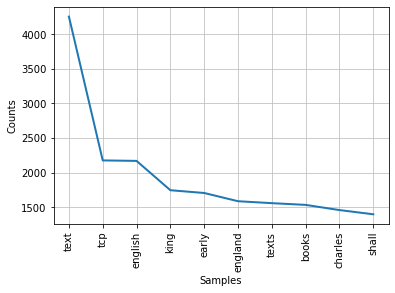

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
# plot the frequency of N most frequent words
N = 10
frequencies.plot( N )

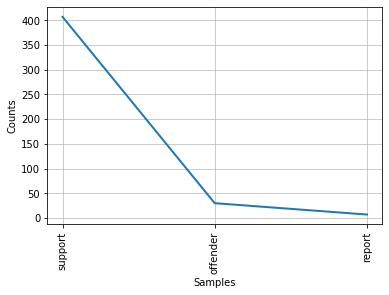

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
# re-create the list of tokens to include only the keywords, count them, and plot them
tokens = [ token for token in tokens if token in KEYWORDS ] 
frequencies = FreqDist( tokens )
frequencies.plot()

In [10]:
# read the given file, tokenize its words, and normalize them
data        = open( file ).read()
tokens      = word_tokenize( data )
tokens      = [ token.lower() for token in tokens if token.isalpha() ]
tokens      = [ token for token in tokens if token not in stopwords ] 
frequencies = FreqDist( tokens ).values()


In [11]:
# calculate mean (average), variance, and standard deviation
mean        = sum( frequencies ) / len( frequencies )
variance    = sum( ( frequency-mean )**2 for frequency in frequencies ) / len(frequencies)
deviation   = variance**0.5
print( "mean: %f; variance: %f; deviation: %f" % ( mean, variance, deviation ) )

mean: 20.757432; variance: 9718.974684; deviation: 98.584860


In [12]:
# create a list of second-teir "interesting" words

# initialize
frequencies = FreqDist( tokens )
n           = round( mean + deviation )
interesting = {}

# loop through each token in the frequencies
for token in frequencies :

        # parse
        count = frequencies[ token ]
        
        # update, optionally
        if ( mean <= count <= n ) : interesting[ token ] = count

# output
print( interesting )

{'better': 118, 'august': 117, 'divers': 116, 'june': 116, 'thing': 116, 'brought': 115, 'read': 115, 'march': 114, 'duke': 114, 'house': 113, 'require': 113, 'wines': 113, 'called': 112, 'ever': 112, 'received': 111, 'three': 111, 'october': 111, 'town': 110, 'nation': 110, 'war': 109, 'iustices': 109, 'sheriffs': 109, 'father': 109, 'execution': 109, 'times': 109, 'whose': 108, 'put': 108, 'words': 107, 'thousand': 107, 'prince': 105, 'together': 105, 'goods': 105, 'necessary': 105, 'proclamations': 104, 'fully': 104, 'dominion': 104, 'humble': 101, 'high': 101, 'answer': 101, 'life': 101, 'dominions': 101, 'december': 101, 'full': 100, 'sacred': 100, 'discovery': 99, 'army': 99, 'almighty': 98, 'bring': 98, 'desire': 98, 'popish': 98, 'third': 98, 'churches': 98, 'receive': 97, 'appointed': 96, 'annotation': 96, 'done': 96, 'short': 95, 'offenders': 95, 'best': 94, 'free': 93, 'matters': 93, 'twelfth': 93, 'defects': 93, 'none': 93, 'former': 93, 'thirteenth': 93, 'say': 93, 'means'